
<img src="images/utfsm.png" alt="" width="200px" align="right"/>

<br/>

# Taller de Manejo y Visualización de Datos con Python
GQM<br/>
Felipe González P.<br/>
felipe.gonzalezp.12@sansano.usm.cl<br/>

<br/>
Jueves Bloque 7-8<br/>
Campus San Joaquín




<h1 align="center" > Goal - Question - Metric </h1>

# ¿Para qué sirve?

* Es una técnica para identificar medidas significativas al medir procesos. 
* GQM permite escoger las metricas adecuadas


# ¿Qué implica?

* Las preguntas son formuladas en relación al objetivo.
* Medidas son escogidas para responder cada pregunta
* GQM enfatiza la necesidad de: 
> * Establecer una medición del objetivo. 
> * Definir un conjunto de preguntas para alcanzar el objetivo. 
> * Identificar metricas para responder preguntas. 

## Objetivo:
> * Define lo que la organización desea mejorar

## Preguntas:
> * Permite que los objetivos sean más cuantificables

## Métricas:
> * Medidas requeridas para responder cada pregunta

    
<div align="center"> <img src="gqm.png"></img></div>


# Ejemplo

* Objetivo:
> * Incrementar productividad
* Preguntas:
> * ¿Cuáles son los cuellos de botella?
> * ¿Cómo podemos aumentar la cantidad de código que producimos?
* Medidas:
> Cantidad de lineas de código por programador


# ¿Cómo definir mi objetivo?

**Analizar** {nombre de la actividad o atributo} <br>
**con el propósito de** {objetivo general} <br>
**con respecto a** {los aspectos a ser considerados}<br>
**desde el punto de vista de** {personas interesadas} <br>
**en el contexto del** {ambiente}<br>

# Ejemplo
**Analizar** la arquitectura del programa 'Health Watcher'<br>
**con el fin** de evaluar componentes arquitectónicos <r>
**con respecto a ** la capacidad de hacer Health Watcher más extensible <br>
**desde el punto de vista** de los arquitectos de software que realizan el trabajo <br>
**en el contexto de** la mejora del producto sobre los próximos tres años <br>


# Mini Actividad

Aplique GQM para los siguientes tres objetivos:
> * Determinar quién es el mejor compañero
> * Escoger el mejor regalo para el/la polol@
> * Definir el mejor plato a servir a un "opinólogo gastronómico"

<h1 align="center">Visualizando Errores</h1>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Errorbars simples
Se puede visualizar errores con matplotlib de la siguiente manera:

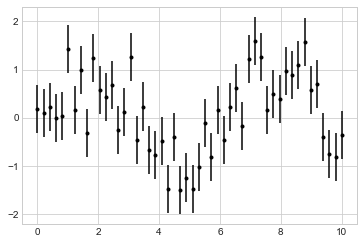

In [18]:
x = np.linspace(0, 10, 50)
dy = 0.5 #+- al punto evaluado
y = np.sin(x) + dy * np.random.randn(50) #randn crea un arreglo de 50 valores entre [0,1)

plt.errorbar(x, y, yerr=dy, fmt='.k'); #prueben quitando fmt

*fmt* es un parámetro que nos permite controlar la apariencia de las lineas y puntos. 



Junto con las opciones básicas anteriores, *errorbar* tiene otros parámetros modificables con los cuales es posible obtener mejores resultados. 

Puede ser de ayuda, sobre todo en visualizaciones con una gran cantidad de puntos, hacer las lineas más claras que los puntos

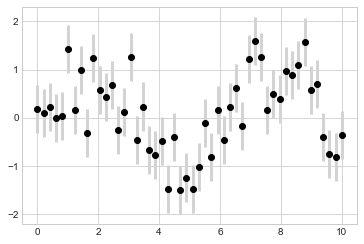

In [24]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3);

## Mini Ejercicio

Suponga que en un diccionario llamado *resultados* se almacenan los puntajes obtenidos en una prueba para un conjunto de personas. La llave del diccionario será el nombre del individuo y el valor determinará el resultado obtenido en el examen. Suponga que el puntaje obtenido tiene un margen de error de $\pm2$.

Entrege como resultado la siguiente figura

In [26]:
resultados = {
    "Juan": 10,
    "Leopoldo": 40,
    "Waripolo": 30.2,
    "Pepito": 18.2,
    "Florencia":9.2 
}


<div align="center"> <img src="mini_ejercicio1.png"></img></div>

<h1 align="center" > Diagramas de densidad y contorno</h1>

En algunos casos puede ser útil representar data de tres dimensiones en dos dimensiones. Esto es posible utilizando diagramas de densidad y contorno. 

Existen tres funciones en Matplotlib que ayudan a esta tarea:
>* plt.contour : gráficos de contorno
>* plt.contourf : graficos de contorno rellenos
>* plt.imshow : útil para mostrar imágenes



### Importemos la librería y las funciones necesarias

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

### Visualizando una función de tres dimensiones

Utilizaremos un gráfico de contorno para la función $z = f(x,y)$

In [46]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Un gráfico de contorno puede ser creado usando *plt.contour*. Esta toma tres argumentos:una lista de valores de x, una lista de valores de y, y una lista de valores de z. 

x e y representan posiciones dentro de la figura y z será representando por niveles de contorno. 

La forma más directa de preparar dichos datos es usando la función np.meshgrid, que construye grillas bidimensionales a partir de elementos unidimensionales:

In [49]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Un diagrama de contorno básico estará dado por:

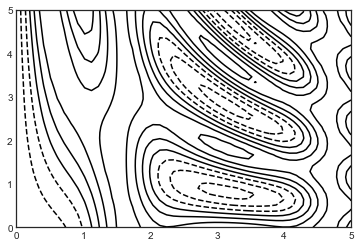

In [53]:
plt.contour(X, Y, Z, colors='black'); #probar quitando colors


Cuando un único color es usado, valores negativos son representados por lineas segmentadas mientras que valores positivos son representados por lineas sólidas. 

De manera alternativa es posible cambiar los colores utilizando el parámetro cmap. Aquí ademas indicaremos que se dibujen más lineas (20 igualmente equiespaciadas dentro del rango de datos)

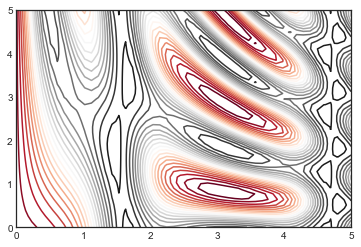

In [67]:
plt.contour(X, Y, Z, 20, cmap='RdGy'); #probar con brg
#plt.colorbar() #probar

Para ver otros colores, se debe escribir:
#plt.cm.<TAB>

In [ ]:
plt.cm.

Si bien nuestro gráfico se ve bastante bien, algunos podrían considerar distractor el espacio entre las lineas. Esto se puede cambiar utilizando la función *plt.contourf()*, la cual usa la misma sintaxis que *plt.contour()*

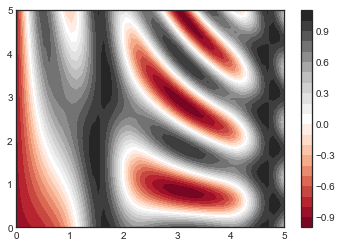

In [74]:
plt.contourf(X, Y, Z, 20, cmap='RdGy') #20, corresponde al intervalo de valores en donde se evalua
plt.colorbar();

La barra de colores indica claramente que las regiones negras son los "peaks", mientras que las regiones rojas serán los valles.

Una queja que alguien podría presentar es que el gráfico se encuentra muy "manchado", ya que los colores están puestos de manera discreta y no continua. 

Esto puede arreglarse estableciendo el número de contornos con un valor muy alto (esto puede ser costoso computacionalmente). 

Una manera óptima de manejar esta situación es usando *plt.imshow()*, la que interpreta una grilla de dos dimensiones como una imagen

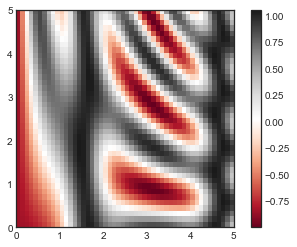

In [90]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',    cmap='RdGy') #extent permite cambiar el aspecto
plt.colorbar()
plt.axis(aspect='image');

Algunas cosas sobre *imshow()*:
>* plt.imshow() permite especificar manualmente [xmin,xmax,ymin,ymax]
>* plt.imshow() por defecto sigue patrones básicos como por ejemplo: el origen se sutea arriba en la derecha. Debido a esto es que se le debe indicar claramente cual será el origen para el diagrama de contornos.
>* plt.imshow() automaticamente ajustará los aspectos del *ratio* para calzar con la data de entrada. *plt.axis(aspect='image')* provoca el calce.

Por último, en algunos casos es interesante combinar gráficos en formato de imagen junto con gráficos de contorno. En este caso se utiliza una imagen de fondo (con alpha = 0.5) y sobre ella se posiciona un gráfico de contorno con etiquetas en los bordes (se usó plt.clabel() para esto último)

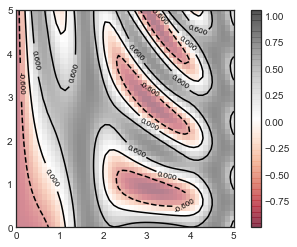

In [92]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

La combinación de esta tres funciones:*plt.contour, pt.contourf, plt.imshow* establece posibilidades sin límites para mostrar datos de tres dimensiones en gráficos de dos dimensiones. 

Sea $f(x,y) =(1-\frac{x}{2}+x^{5}+y^{3}) *\exp(-x^{2}-y^{2})$. Imitar la siguiente visualización utilizando todo lo visto en clases 


In [ ]:
def f(x,y): 
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)


<div align="center"> <img src="mini_ejercicio222.png" ></img> </div>

<h1 align="center" > Gráficos de superficie</h1>

Si bien el gráfico de contorno es bastante útil, en algunos casos puede que queramos representar nuestras funciones a través de visualizaciones en 3d

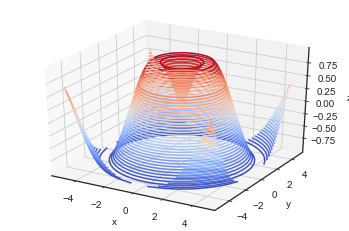

In [194]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 40, cmap=cm.coolwarm) #cambiar el 50
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

No olvidar que estas funciones requieren que la data sea pasada a través de una grilla o matriz en dos dimensiones. Z será evaluado en cada uno de los puntos de la grilla

En algunos casos el ángulo inicial por defecto no es el óptimo, para esos momentos se puede utilizar *view_init* el cual cambiará el ángulo de elevación. 

En el siguiente ejemplo se eleva 50 grados (sobre el plano x-y) y acimut tiene un valor de -30 grados (se rotan -30 grados en sentido reloj sobre el eje z)

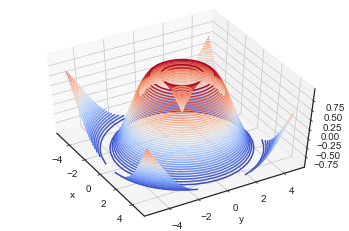

In [203]:
ax.view_init(50, -30)
fig

<h1 align="center" > Wireframes and Surface Plots </h1>

Un Wireframe podríamos interpretarlo como un gráfico en el cual la data está representado por una malla. 

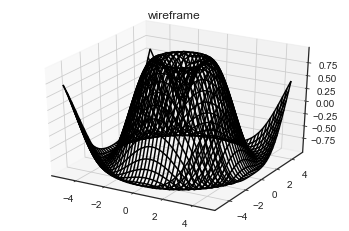

In [204]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

Un gráfico de superficie será similar a un wireframe, pero cada cara de este estará relleno. Se puede añadir colores al relleno para establecer visualizaciones interesantes

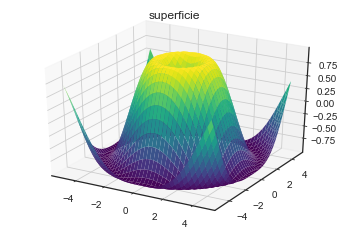

In [209]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,
                cmap='viridis', edgecolor='none')
ax.set_title('superficie');


Hay que tener en cuenta que aunque la grilla de valores para un gráfico de superficie debe ser bidimensional, no necesita ser rectilínea. Aquí hay un ejemplo de cómo crear una cuadrícula polar parcial, que cuando se usa con la trama surface3D puede darnos un corte en la función que estamos visualizando:

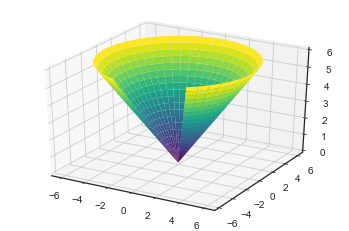

In [214]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none');

## Ejercicio

Desarrolle 4 gráficos en los cuales utilice *surface plots * y *wireframes*. Utilice toda su creatividad y la materia vista hasta ahora para llegar al mejor resultado posible. 

El mejor resultado gana un premio.

